<div class="alert alert-block alert-success">
<b>Comentario general del revisor</b> <a class="tocSkip"></a><br />
Status del proyecto: <b>Aprobado</b>
    

</div>


¡Hola!<br />
Soy **Francisco Cortés**, estoy contento de revisar tu proyecto y ser parte de tu proceso de aprendizaje.
A lo largo del texto, haré algunas observaciones sobre mejoras en el código y también haré comentarios sobre tus percepciones sobre el tema. Si existe algún error en el código, no te preocupes, estoy aquí para ayudarte a mejorarlo, en la primera iteración te lo señalaré para que tengas la oportunidad de corregirlo, pero si aún no encuentras una solución para esta tarea, te daré una pista más precisa en la próxima iteración y también algunos ejemplos prácticos. Estaré abierto a retroalimentación y discusiones sobre el tema.<br />
Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o borres**.
Revisaré cuidadosamente tu código para comprobar que se han cumplido con los requisitos y te proporcionaré mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si la ejecución fue perfecta succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existe alguna recomendación para que tu código mejore.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existen correcciones necesarias para cumplir con los requisitos. El trabajo no puede ser aceptado si hay alguna caja roja.
</div>

Puedes responderme de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>


# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [1]:

# Cargar todas las librerías

from scipy import stats as st
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames

calls=pd.read_csv('/datasets/megaline_calls.csv')
internet=pd.read_csv('/datasets/megaline_internet.csv')
messages=pd.read_csv('/datasets/megaline_messages.csv')
plans=pd.read_csv('/datasets/megaline_plans.csv')
users=pd.read_csv('/datasets/megaline_users.csv')

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas

calls.info()
internet.info()
messages.info()
plans.info()
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dty

In [4]:
# Imprime una muestra de los datos para las tarifas

print(calls.head())
print(internet.head())
print(messages.head())
print(plans.head())
print(users.head())

         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22
         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22
         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26
   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0       

[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

##### * En los datasets, tenemos columnas de fechas que aparecen como tipo `'object'`, en este caso es necesario realizar una transformación a `'datetime'`.
##### * No se encuentran valores nulos relevantes excepto por `churn_date`, lo cual es esperado ya que el usuario sigue activo.
##### * En `calls`, nuestros valores aparecen como valores decimales y en `internet`, el uso aparece en MB; debido a que las tarifas se cobran por minuto y por GB, no por valores exactos, es necesario redondear hacia arriba.
##### * En `users` observamos dos datos, fecha de registro `reg_date` y fecha de baja `churn_date`, por lo cual es necesario filtrar el cálculo mensual para hacer el cobro correspondiente al uso del servicio.
##### * Los nombres de los planes hacen coincidencia, por lo cual se puede realizar el merge sin problemas.
##### * No se observan duplicados a simple vista, sin embargo será necesario realizar un analisis más profundo.

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [5]:

# CONVERSIÓN DE FECHAS A FORMATO DATETIME

calls['call_date'] = pd.to_datetime(calls['call_date'])
messages['message_date'] = pd.to_datetime(messages['message_date'])
internet['session_date'] = pd.to_datetime(internet['session_date'])
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'])


# AGREGAR COLUMNAS DE MES Y AÑO
# Para llamadas
calls['month'] = calls['call_date'].dt.month
calls['year'] = calls['call_date'].dt.year

# Para mensajes
messages['month'] = messages['message_date'].dt.month
messages['year'] = messages['message_date'].dt.year

# Para internet
internet['month'] = internet['session_date'].dt.month
internet['year'] = internet['session_date'].dt.year


# REDONDEO DE DURACIÓN DE LLAMADAS
calls['duration_ceil'] = np.ceil(calls['duration'])



# Vista previa para verificar los cambios
print(calls.head())
print(internet.head())
print(messages.head())
print(users.head())

         id  user_id  call_date  duration  month  year  duration_ceil
0   1000_93     1000 2018-12-27      8.52     12  2018            9.0
1  1000_145     1000 2018-12-27     13.66     12  2018           14.0
2  1000_247     1000 2018-12-27     14.48     12  2018           15.0
3  1000_309     1000 2018-12-28      5.76     12  2018            6.0
4  1000_380     1000 2018-12-30      4.22     12  2018            5.0
         id  user_id session_date  mb_used  month  year
0   1000_13     1000   2018-12-29    89.86     12  2018
1  1000_204     1000   2018-12-31     0.00     12  2018
2  1000_379     1000   2018-12-28   660.40     12  2018
3  1000_413     1000   2018-12-26   270.99     12  2018
4  1000_442     1000   2018-12-27   880.22     12  2018
         id  user_id message_date  month  year
0  1000_125     1000   2018-12-27     12  2018
1  1000_160     1000   2018-12-31     12  2018
2  1000_223     1000   2018-12-31     12  2018
3  1000_251     1000   2018-12-27     12  2018
4  1000_2

## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [6]:
# AGRUPAR MINUTOS USADOS POR USUARIO Y MES
# Sumamos los minutos redondeados ('duration_ceil') por usuario, mes y año
monthly_calls = (
    calls.groupby(['user_id', 'year', 'month'])['duration_ceil']
    .sum()
    .reset_index()
)

# Renombramos columna
monthly_calls = monthly_calls.rename(columns={'duration_ceil': 'minutes_used'})


# 2. AGRUPAR MENSAJES ENVIADOS POR USUARIO Y MES
# Contamos cuántos mensajes se enviaron por usuario, mes y año
monthly_messages = (
    messages.groupby(['user_id', 'year', 'month'])['id']
    .count()
    .reset_index()
)

monthly_messages = monthly_messages.rename(columns={'id': 'messages_sent'})


# 3. AGRUPAR DATOS (MB) USADOS POR USUARIO Y MES
# Sumamos los MB usados por usuario, mes y año
monthly_internet = (
    internet.groupby(['user_id', 'year', 'month'])['mb_used']
    .sum()
    .reset_index()
)

# Convertimos MB → GB cobrables (redondeo hacia arriba)
monthly_internet['gb_used'] = np.ceil(monthly_internet['mb_used'] / 1024)


# UNIR LOS TRES DATAFRAMES
monthly_usage = monthly_calls.copy()

monthly_usage = monthly_usage.merge(
    monthly_messages,
    on=['user_id', 'year', 'month'],
    how='outer'
)

monthly_usage = monthly_usage.merge(
    monthly_internet[['user_id', 'year', 'month', 'gb_used']],
    on=['user_id', 'year', 'month'],
    how='outer'
)


# REEMPLAZAR NA POR 0 EN USO
monthly_usage[['minutes_used', 'messages_sent', 'gb_used']] = (
    monthly_usage[['minutes_used', 'messages_sent', 'gb_used']]
    .fillna(0)
)



# AGREGAR INFORMACIÓN DE USUARIO Y PLAN
monthly_usage = monthly_usage.merge(
    users[['user_id', 'plan', 'reg_date', 'churn_date']],
    on='user_id',
    how='left'
)

monthly_usage = monthly_usage.merge(
    plans,
    left_on='plan',
    right_on='plan_name',
    how='left'
)


# FILTRAR MESES ANTES DEL REGISTRO O DESPUÉS DEL CHURN
# Extraer año y mes del registro
monthly_usage['reg_year'] = monthly_usage['reg_date'].dt.year
monthly_usage['reg_month'] = monthly_usage['reg_date'].dt.month

# Filtrar meses previos al registro
monthly_usage = monthly_usage[
    ~(
        (monthly_usage['year'] < monthly_usage['reg_year']) |
        ((monthly_usage['year'] == monthly_usage['reg_year']) &
         (monthly_usage['month'] < monthly_usage['reg_month']))
    )
]

# Filtrar meses posteriores al churn
monthly_usage = monthly_usage[
    ~(
        (~monthly_usage['churn_date'].isna()) &
        (
            (monthly_usage['year'] > monthly_usage['churn_date'].dt.year) |
            ((monthly_usage['year'] == monthly_usage['churn_date'].dt.year) &
             (monthly_usage['month'] > monthly_usage['churn_date'].dt.month))
        )
    )
]


# NUEVO: AGREGAR COLUMNA "MESES DESDE EL REGISTRO"
monthly_usage['months_since_reg'] = (
    (monthly_usage['year'] - monthly_usage['reg_year']) * 12 +
    (monthly_usage['month'] - monthly_usage['reg_month'])
)


# CALCULAR INGRESOS MENSUALES POR USUARIO
# Cargo base mensual por plan
monthly_usage['monthly_plan_fee'] = monthly_usage['usd_monthly_pay']

# Extra minutos (solo si exceden el límite)
monthly_usage['extra_minutes'] = np.maximum(
    monthly_usage['minutes_used'] - monthly_usage['minutes_included'], 0
)

# Extra mensajes
monthly_usage['extra_messages'] = np.maximum(
    monthly_usage['messages_sent'] - monthly_usage['messages_included'], 0
)

# Extra GB
monthly_usage['extra_gb'] = np.maximum(
    monthly_usage['gb_used'] - monthly_usage['mb_per_month_included'] / 1024, 0
)

# Cargo adicional total
monthly_usage['extra_charges'] = (
    monthly_usage['extra_minutes'] * monthly_usage['usd_per_minute'] +
    monthly_usage['extra_messages'] * monthly_usage['usd_per_message'] +
    monthly_usage['extra_gb'] * monthly_usage['usd_per_gb']
)

# Ingreso total por usuario por mes
monthly_usage['total_revenue'] = (
    monthly_usage['monthly_plan_fee'] + monthly_usage['extra_charges']
)


# ORDENAR EL RESULTADO
monthly_usage = monthly_usage.sort_values(
    by=['user_id', 'year', 'month']
).reset_index(drop=True)

monthly_usage.head()

,user_id,year,month,minutes_used,messages_sent,gb_used,plan,reg_date,churn_date,messages_included,...,plan_name,reg_year,reg_month,months_since_reg,monthly_plan_fee,extra_minutes,extra_messages,extra_gb,extra_charges,total_revenue
0,1000,2018,12,124.0,11.0,2.0,ultimate,2018-12-24,NaT,1000,...,ultimate,2018,12,0,70,0.0,0.0,0.0,0.00,70.00
1,1001,2018,8,182.0,30.0,7.0,surf,2018-08-13,NaT,50,...,surf,2018,8,0,20,0.0,0.0,0.0,0.00,20.00
2,1001,2018,9,315.0,44.0,14.0,surf,2018-08-13,NaT,50,...,surf,2018,8,1,20,0.0,0.0,0.0,0.00,20.00
3,1001,2018,10,393.0,53.0,22.0,surf,2018-08-13,NaT,50,...,surf,2018,8,2,20,0.0,3.0,7.0,70.09,90.09
4,1001,2018,11,426.0,36.0,19.0,surf,2018-08-13,NaT,50,...,surf,2018,8,3,20,0.0,0.0,4.0,40.00,60.00


## Usuarios/as

In [7]:
# Imprime la información general/resumida sobre el DataFrame de usuarios

# Información general del dataframe 'users'
print(users.info())
print(users.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB
None
   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo

In [8]:
# Imprime una muestra de datos para usuarios

print(users.sample(10))

     user_id  first_name   last_name  age  \
169     1169         Hai        Bean   67   
347     1347        Trey       Lynch   65   
467     1467    Nickolas      Deleon   64   
109     1109     Dominic     Salinas   41   
91      1091      Taylor      Oliver   38   
208     1208     Enrique     Ramirez   44   
406     1406       Noble   Jefferson   54   
45      1045      Barney      Ortega   20   
34      1034          Jc      Gentry   22   
42      1042  Clementina  Mclaughlin   40   

                                                city   reg_date      plan  \
169        New York-Newark-Jersey City, NY-NJ-PA MSA 2018-12-06      surf   
347              Charleston-North Charleston, SC MSA 2018-06-17  ultimate   
467            Atlanta-Sandy Springs-Roswell, GA MSA 2018-01-31  ultimate   
109        New York-Newark-Jersey City, NY-NJ-PA MSA 2018-02-16      surf   
91          Riverside-San Bernardino-Ontario, CA MSA 2018-05-04  ultimate   
208           San Diego-Chula Vista-Carlsb

[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

##### El dataframe `users` se ve bien estructurado, los tipos de datos son correctos, no hay datos faltantes problematicos y los valores entran dentro de lo esperado.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [9]:
# No es necesario realizar correcciones a los datos

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [10]:
# No hay necesidad de realizar enriquecimiento ya que se realizó en un paso anterior

## Llamadas

In [11]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas

# Imprime la información general del DataFrame de llamadas
print(calls.info())

# Muestra las primeras filas para inspeccionar los datos
print(calls.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             137735 non-null  object        
 1   user_id        137735 non-null  int64         
 2   call_date      137735 non-null  datetime64[ns]
 3   duration       137735 non-null  float64       
 4   month          137735 non-null  int64         
 5   year           137735 non-null  int64         
 6   duration_ceil  137735 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 7.4+ MB
None
         id  user_id  call_date  duration  month  year  duration_ceil
0   1000_93     1000 2018-12-27      8.52     12  2018            9.0
1  1000_145     1000 2018-12-27     13.66     12  2018           14.0
2  1000_247     1000 2018-12-27     14.48     12  2018           15.0
3  1000_309     1000 2018-12-28      5.76     12  2018  

In [12]:
# Imprime una muestra de datos para las llamadas

print(calls.sample(10))

               id  user_id  call_date  duration  month  year  duration_ceil
129747   1466_199     1466 2018-05-20      0.00      5  2018            0.0
57709     1209_36     1209 2018-12-04      0.00     12  2018            0.0
10175     1046_41     1046 2018-07-20      1.76      7  2018            2.0
114235   1400_585     1400 2018-07-16      0.00      7  2018            0.0
79525   1284_1041     1284 2018-12-20      8.38     12  2018            9.0
88118    1324_164     1324 2018-04-07      6.70      4  2018            7.0
91475    1329_445     1329 2018-10-04      0.00     10  2018            0.0
109628     1387_0     1387 2018-08-31      4.11      8  2018            5.0
82003    1295_453     1295 2018-12-22      4.83     12  2018            5.0
134940    1490_40     1490 2018-09-24     11.17      9  2018           12.0


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [13]:
# Verificar tipos de datos
print("Tipos de datos actuales:\n", calls.dtypes)
print("\n")


# Verificar datos faltantes
print("Valores nulos por columna:\n", calls.isna().sum())
print("\n")


# Buscar valores anómalos en duración
# Duraciones negativas
negative_durations = calls[calls['duration'] < 0]
print(f"Duraciones negativas encontradas: {len(negative_durations)}")
print(negative_durations.head(), "\n")

# Duraciones extremadamente grandes (> 500 min)
large_durations = calls[calls['duration'] > 500]
print(f"Duraciones mayores a 500 min encontradas: {len(large_durations)}")
print(large_durations.head(), "\n")


# Revisar duplicados
duplicated_rows = calls.duplicated().sum()
duplicated_ids = calls['id'].duplicated().sum()

print(f"Filas duplicadas completas: {duplicated_rows}")
print(f"IDs duplicados (posibles registros repetidos): {duplicated_ids}\n")


# Convertir duration_ceil a int si está como float
if calls['duration_ceil'].dtype != 'int64':
    print("Convirtiendo duration_ceil a entero...")
    calls['duration_ceil'] = calls['duration_ceil'].astype(int)

# Eliminar filas con duración negativa (si existen)
if len(negative_durations) > 0:
    print(f"Eliminando {len(negative_durations)} filas con duración negativa...")
    calls = calls[calls['duration'] >= 0]

# Filtrar duraciones muy grandes si son errores
#    Aquí solo mostramos, no eliminamos
if len(large_durations) > 0:
    print("ADVERTENCIA: Existen duraciones muy grandes..\n")

# Eliminar filas duplicadas exactas
if duplicated_rows > 0:
    print(f"Eliminando {duplicated_rows} filas duplicadas...")
    calls = calls.drop_duplicates()

print("Correcciones completadas.\n")

Tipos de datos actuales:
 id                       object
user_id                   int64
call_date        datetime64[ns]
duration                float64
month                     int64
year                      int64
duration_ceil           float64
dtype: object


Valores nulos por columna:
 id               0
user_id          0
call_date        0
duration         0
month            0
year             0
duration_ceil    0
dtype: int64


Duraciones negativas encontradas: 0
Empty DataFrame
Columns: [id, user_id, call_date, duration, month, year, duration_ceil]
Index: [] 

Duraciones mayores a 500 min encontradas: 0
Empty DataFrame
Columns: [id, user_id, call_date, duration, month, year, duration_ceil]
Index: [] 

Filas duplicadas completas: 0
IDs duplicados (posibles registros repetidos): 0

Convirtiendo duration_ceil a entero...
Correcciones completadas.



### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [14]:
# No se concidera necesario enriquecer datos

## Mensajes

In [15]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes

print(messages.info())
print(messages.head())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   month         76051 non-null  int64         
 4   year          76051 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 2.9+ MB
None
         id  user_id message_date  month  year
0  1000_125     1000   2018-12-27     12  2018
1  1000_160     1000   2018-12-31     12  2018
2  1000_223     1000   2018-12-31     12  2018
3  1000_251     1000   2018-12-27     12  2018
4  1000_255     1000   2018-12-26     12  2018


In [16]:
# Imprime una muestra de datos para los mensajes

print(messages.sample(10)) 

             id  user_id message_date  month  year
63099    1401_3     1401   2018-11-23     11  2018
12247  1080_250     1080   2018-11-21     11  2018
61132  1384_203     1384   2018-09-25      9  2018
69377   1451_74     1451   2018-09-13      9  2018
1504    1015_79     1015   2018-12-07     12  2018
37821   1250_74     1250   2018-11-14     11  2018
62368  1392_143     1392   2018-12-20     12  2018
40393   1261_20     1261   2018-02-25      2  2018
16677  1111_178     1111   2018-11-15     11  2018
43371   1287_45     1287   2018-11-30     11  2018


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]


##### * Nuestros datos aparecen con valores y formatos correctos, no tenemos valores nulos.
##### * Se hará una verificacion de valores duplicados, se verificará si hay usuarios sin mensajes y fechas fuera de rango y verificar que los valores de `message_date` coincidan.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [17]:
print("TIPOS DE DATOS:")
print(messages.dtypes)
print("\n")


# Verificar duplicados
duplicates_full = messages.duplicated().sum()
duplicates_id = messages['id'].duplicated().sum()

print(f"Duplicados completos: {duplicates_full}")
print(f"Duplicados en 'id': {duplicates_id}\n")


# 2. Verificar fechas inconsistentes
wrong_month = messages[messages['message_date'].dt.month != messages['month']]
wrong_year = messages[messages['message_date'].dt.year != messages['year']]

print(f"Registros con month incorrecto: {len(wrong_month)}")
print(f"Registros con year incorrecto: {len(wrong_year)}\n")


# Verificar fechas fuera de 2018
out_of_range = messages[
    (messages['message_date'] < '2018-01-01') |
    (messages['message_date'] > '2018-12-31')
]

print(f"Fechas fuera del rango 2018: {len(out_of_range)}\n")


# Asegurarnos que month y year coinciden
messages['month'] = messages['message_date'].dt.month
messages['year'] = messages['message_date'].dt.year

print("Correcciones completadas.")

TIPOS DE DATOS:
id                      object
user_id                  int64
message_date    datetime64[ns]
month                    int64
year                     int64
dtype: object


Duplicados completos: 0
Duplicados en 'id': 0

Registros con month incorrecto: 0
Registros con year incorrecto: 0

Fechas fuera del rango 2018: 0

Correcciones completadas.


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [18]:
# No se concidera necesario realizar enriquecimiento de los datos.

## Internet

In [19]:
# Imprime la información general/resumida sobre el DataFrame de internet

print(internet.info())
print(internet.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   month         104825 non-null  int64         
 5   year          104825 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 4.8+ MB
None
         id  user_id session_date  mb_used  month  year
0   1000_13     1000   2018-12-29    89.86     12  2018
1  1000_204     1000   2018-12-31     0.00     12  2018
2  1000_379     1000   2018-12-28   660.40     12  2018
3  1000_413     1000   2018-12-26   270.99     12  2018
4  1000_442     1000   2018-12-27   880.22     12  2018


In [20]:
# Imprime una muestra de datos para el tráfico de internet

print(internet.sample(10))

             id  user_id session_date  mb_used  month  year
98066   1462_39     1462   2018-12-04    91.47     12  2018
7476   1041_316     1041   2018-12-10   321.89     12  2018
10212  1053_105     1053   2018-10-14   490.43     10  2018
55327  1251_138     1251   2018-09-09   789.53      9  2018
91472    1422_3     1422   2018-11-20   403.95     11  2018
96363  1451_108     1451   2018-09-27    11.78      9  2018
68055  1316_377     1316   2018-12-13   341.14     12  2018
46833   1209_40     1209   2018-09-14   357.60      9  2018
22871   1106_51     1106   2018-11-11     0.00     11  2018
45287  1201_149     1201   2018-07-26   379.04      7  2018


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]


##### * No se encuentran valores faltantes.
##### * Los tipos de datos corresponden a los requeridos para el análisis.
##### * A simple vista, no se observan valores atipicos en la columna `mb_used`.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [21]:
print("\nTIPOS DE DATOS:")
print(internet.dtypes)


# Valores nulos
print("\nVALORES NULOS POR COLUMNA:")
print(internet.isna().sum())


# Fechas fuera de rango esperado (2018)
invalid_year = internet[(internet["year"] != 2018)]
print("\nRegistros con año incorrecto:")
print(invalid_year.head())

invalid_month = internet[(internet["month"] < 1) | (internet["month"] > 12)]
print("\nRegistros con mes incorrecto:")
print(invalid_month.head())


# mb_used negativa o extremadamente alta
negatives = internet[internet["mb_used"] < 0]
print("\nRegistros con MB negativas:")
print(negatives.head())

outliers_high = internet[internet["mb_used"] > 50000]  # 50GB (punto arbitrario)
print("\nRegistros con MB extremadamente altos (>50,000 MB):")
print(outliers_high.head())


# Duplicados
print("\nDuplicados completos:", internet.duplicated().sum())
print("Duplicados en 'id':", internet["id"].duplicated().sum())


# Revisión de fechas inconsistentes
date_inconsistent = internet[
    (internet["session_date"].dt.month != internet["month"]) |
    (internet["session_date"].dt.year != internet["year"])
]
print("\nFechas inconsistentes (fecha vs month/year):")
print(date_inconsistent.head())


print("\nValidación completada.")


TIPOS DE DATOS:
id                      object
user_id                  int64
session_date    datetime64[ns]
mb_used                float64
month                    int64
year                     int64
dtype: object

VALORES NULOS POR COLUMNA:
id              0
user_id         0
session_date    0
mb_used         0
month           0
year            0
dtype: int64

Registros con año incorrecto:
Empty DataFrame
Columns: [id, user_id, session_date, mb_used, month, year]
Index: []

Registros con mes incorrecto:
Empty DataFrame
Columns: [id, user_id, session_date, mb_used, month, year]
Index: []

Registros con MB negativas:
Empty DataFrame
Columns: [id, user_id, session_date, mb_used, month, year]
Index: []

Registros con MB extremadamente altos (>50,000 MB):
Empty DataFrame
Columns: [id, user_id, session_date, mb_used, month, year]
Index: []

Duplicados completos: 0
Duplicados en 'id': 0

Fechas inconsistentes (fecha vs month/year):
Empty DataFrame
Columns: [id, user_id, session_date, mb_u

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [22]:
# No se concidera necesario realizar enriquecimiento de los datos.

## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [23]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras

# Imprime información general del DataFrame de tarifas
print(plans.info())
print("\n--- Muestra de datos de las tarifas ---")
print(plans.head(10))

print("\n--- Descripción estadística ---")
print(plans.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None

--- Muestra de datos de las tarifas ---
   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_na

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>

Los datos fueron revisados y modificados apropiadamente, ahora se puede empezar a trabajar con ellos comodamente
</div>


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [24]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
calls_per_user_month = (
    calls.groupby(['user_id', 'year', 'month'])
         .agg(calls_count=('id', 'count'))
         .reset_index()
)


print(calls_per_user_month.head())

   user_id  year  month  calls_count
0     1000  2018     12           16
1     1001  2018      8           27
2     1001  2018      9           49
3     1001  2018     10           65
4     1001  2018     11           64


In [25]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
minutes_per_user_month = (
    calls.groupby(['user_id', 'year', 'month'])
         .agg(minutes_used=('duration_ceil', 'sum'))
         .reset_index()
)


print(minutes_per_user_month.head())

   user_id  year  month  minutes_used
0     1000  2018     12           124
1     1001  2018      8           182
2     1001  2018      9           315
3     1001  2018     10           393
4     1001  2018     11           426


In [26]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
messages_per_user_month = (
    messages.groupby(['user_id', 'year', 'month'])
            .size()
            .reset_index(name='messages_sent')
)


print(messages_per_user_month.head())

   user_id  year  month  messages_sent
0     1000  2018     12             11
1     1001  2018      8             30
2     1001  2018      9             44
3     1001  2018     10             53
4     1001  2018     11             36


In [27]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
internet_per_user_month = (
    internet.groupby(['user_id', 'year', 'month'])['mb_used']
            .sum()
            .reset_index()
)

# Convertimos MB → GB y redondeamos hacia arriba
internet_per_user_month['gb_used'] = np.ceil(
    internet_per_user_month['mb_used'] / 1024
)


print(internet_per_user_month.head())

   user_id  year  month   mb_used  gb_used
0     1000  2018     12   1901.47      2.0
1     1001  2018      8   6919.15      7.0
2     1001  2018      9  13314.82     14.0
3     1001  2018     10  22330.49     22.0
4     1001  2018     11  18504.30     19.0


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [28]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
monthly_usage = calls_per_user_month.merge(
    minutes_per_user_month,
    on=['user_id', 'year', 'month'],
    how='outer'
)

monthly_usage = monthly_usage.merge(
    messages_per_user_month,
    on=['user_id', 'year', 'month'],
    how='outer'
)

monthly_usage = monthly_usage.merge(
    internet_per_user_month,
    on=['user_id', 'year', 'month'],
    how='outer'
)

# Rellenar posibles valores faltantes con 0
monthly_usage = monthly_usage.fillna(0)


print(monthly_usage.head())
print(monthly_usage.info())

   user_id  year  month  calls_count  minutes_used  messages_sent   mb_used  \
0     1000  2018     12         16.0         124.0           11.0   1901.47   
1     1001  2018      8         27.0         182.0           30.0   6919.15   
2     1001  2018      9         49.0         315.0           44.0  13314.82   
3     1001  2018     10         65.0         393.0           53.0  22330.49   
4     1001  2018     11         64.0         426.0           36.0  18504.30   

   gb_used  
0      2.0  
1      7.0  
2     14.0  
3     22.0  
4     19.0  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        2293 non-null   int64  
 1   year           2293 non-null   int64  
 2   month          2293 non-null   int64  
 3   calls_count    2293 non-null   float64
 4   minutes_used   2293 non-null   float64
 5   messages_sent  2293 non-null

In [29]:
# Añadir información del plan desde 'plans'
monthly_usage = monthly_usage.merge(
    users[['user_id', 'plan', 'reg_date', 'churn_date']],
    on='user_id',
    how='left'
)

monthly_usage = monthly_usage.merge(
    plans,
    left_on='plan',
    right_on='plan_name',
    how='left'
)


# Calcular los consumos extra
# Extra minutos (solo si exceden el límite del plan)
monthly_usage['extra_minutes'] = np.maximum(
    monthly_usage['minutes_used'] - monthly_usage['minutes_included'], 0
)

# Extra mensajes
monthly_usage['extra_messages'] = np.maximum(
    monthly_usage['messages_sent'] - monthly_usage['messages_included'], 0
)

# Extra GB
monthly_usage['extra_gb'] = np.maximum(
    monthly_usage['gb_used'] - (monthly_usage['mb_per_month_included'] / 1024), 0
)


# Calcular cargos extra por consumo
monthly_usage['extra_charges'] = (
    monthly_usage['extra_minutes'] * monthly_usage['usd_per_minute'] +
    monthly_usage['extra_messages'] * monthly_usage['usd_per_message'] +
    monthly_usage['extra_gb'] * monthly_usage['usd_per_gb']
)

[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [30]:
# Calcula el ingreso mensual para cada usuario

monthly_usage['total_revenue'] = monthly_usage['usd_monthly_pay'] + monthly_usage['extra_charges']


print(monthly_usage.head())
print(monthly_usage[['user_id', 'plan', 'minutes_used', 'extra_minutes',
                     'messages_sent', 'extra_messages', 'gb_used', 'extra_gb',
                     'usd_monthly_pay', 'extra_charges', 'total_revenue']].head())

   user_id  year  month  calls_count  minutes_used  messages_sent   mb_used  \
0     1000  2018     12         16.0         124.0           11.0   1901.47   
1     1001  2018      8         27.0         182.0           30.0   6919.15   
2     1001  2018      9         49.0         315.0           44.0  13314.82   
3     1001  2018     10         65.0         393.0           53.0  22330.49   
4     1001  2018     11         64.0         426.0           36.0  18504.30   

   gb_used      plan   reg_date  ... usd_monthly_pay  usd_per_gb  \
0      2.0  ultimate 2018-12-24  ...              70           7   
1      7.0      surf 2018-08-13  ...              20          10   
2     14.0      surf 2018-08-13  ...              20          10   
3     22.0      surf 2018-08-13  ...              20          10   
4     19.0      surf 2018-08-13  ...              20          10   

   usd_per_message  usd_per_minute  plan_name  extra_minutes  extra_messages  \
0             0.01            0.01  

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />

Buena manera de agregar los datos por usuario, ahora tenemos columnas extras que nos ayudarán con el analisis posterior
</div>


## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

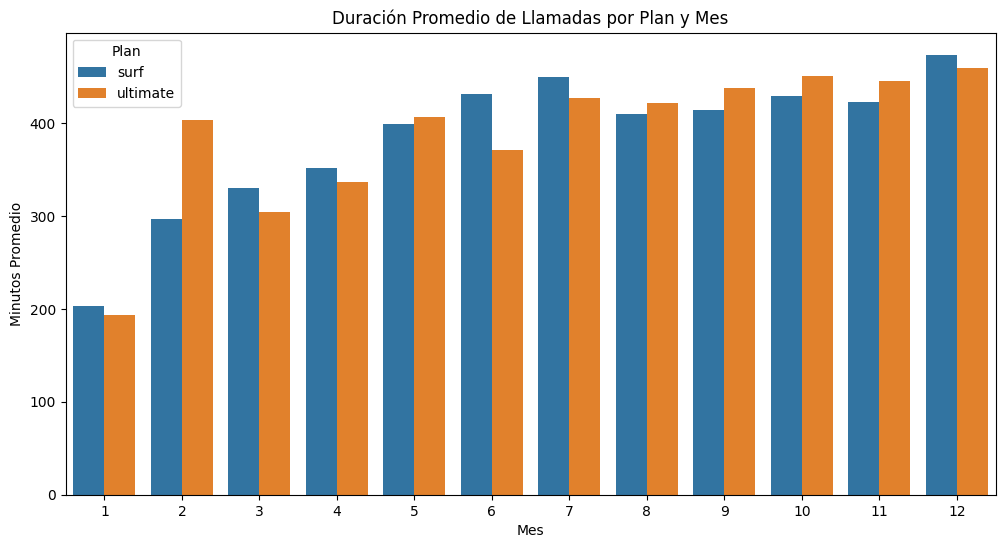

In [31]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

avg_calls = (
    monthly_usage.groupby(['plan', 'month'])['minutes_used']
    .mean()
    .reset_index()
)

# Renombramos para claridad
avg_calls = avg_calls.rename(columns={'minutes_used': 'avg_minutes'})

# Visualización con seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_calls, x='month', y='avg_minutes', hue='plan')
plt.title('Duración Promedio de Llamadas por Plan y Mes')
plt.xlabel('Mes')
plt.ylabel('Minutos Promedio')
plt.legend(title='Plan')
plt.xticks(rotation=0)
plt.show()

No handles with labels found to put in legend.


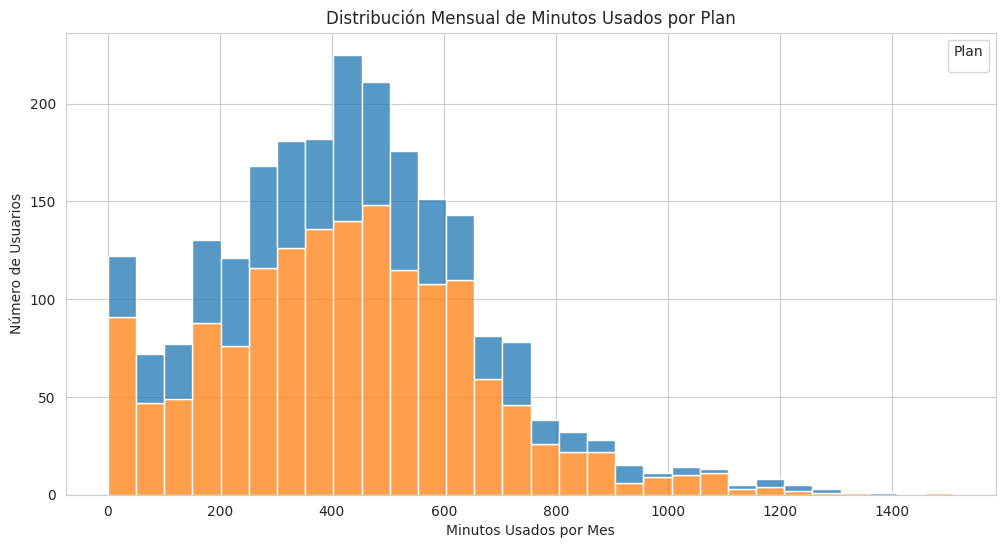

In [32]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Histograma de minutos usados por mes y plan
sns.histplot(
    data=monthly_usage,
    x='minutes_used',
    hue='plan',
    bins=30,          # Número de bins (intervalos)
    kde=False,        # Si quieres la curva KDE, poner True
    multiple="stack"  # Apila los planes para mejor comparación
)

plt.title('Distribución Mensual de Minutos Usados por Plan')
plt.xlabel('Minutos Usados por Mes')
plt.ylabel('Número de Usuarios')
plt.legend(title='Plan')
plt.show()

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [33]:
# Calcula la media y la varianza de la duración mensual de llamadas.
user_call_stats = (
    monthly_usage.groupby('user_id')['minutes_used']
    .agg(['mean', 'var'])
    .reset_index()
)

# Renombrar columnas para mayor claridad
user_call_stats = user_call_stats.rename(
    columns={'mean': 'avg_minutes_per_month', 'var': 'var_minutes_per_month'}
)


print(user_call_stats.head())

   user_id  avg_minutes_per_month  var_minutes_per_month
0     1000             124.000000                    NaN
1     1001             345.600000           10205.300000
2     1002             276.333333           35426.333333
3     1003            1104.000000                    NaN
4     1004             346.500000            7940.571429


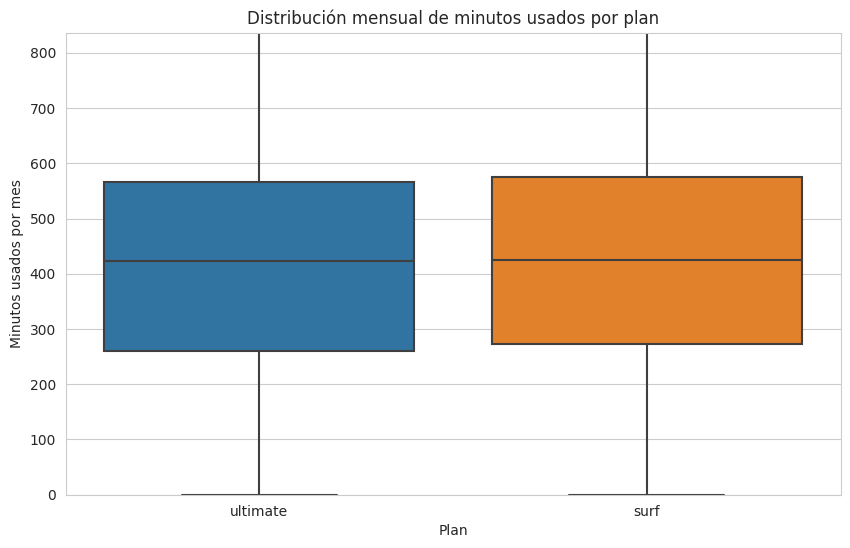

In [34]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

plt.figure(figsize=(10, 6))
sns.boxplot(x='plan', y='minutes_used', data=monthly_usage)
plt.title('Distribución mensual de minutos usados por plan')
plt.xlabel('Plan')
plt.ylabel('Minutos usados por mes')
plt.ylim(0, monthly_usage['minutes_used'].quantile(0.95))  # Limitar valores extremos
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>

Buena manera de mostrar los datos, se puede ver claramente las tendencias de cada uno de los planes gracias a las gráficas que has utilizado con las cuales podemos revisar aspectos diferentes de los planes
</div>


[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]


##### * El plan influye en el comportamiento: los planes con más minutos incluidos tienden a atraer usuarios con consumo más alto y consistente.
##### * Existe heterogeneidad en los usuarios: hay un grupo de usuarios intensivos y otro más moderado, lo que es importante para segmentar estrategias de marketing o diseñar nuevas tarifas.
##### * Existen outliers y variabilidad: algunos usuarios exceden ampliamente los promedios, lo que puede impactar en los ingresos por cargos extra.

### Mensajes

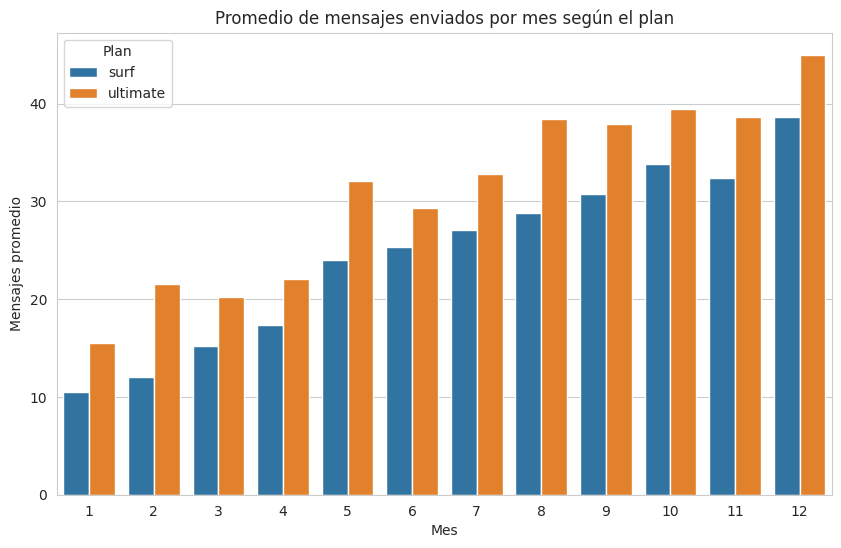

In [35]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
avg_messages_per_plan = monthly_usage.groupby(['plan', 'month'])['messages_sent'].mean().reset_index()

# Graficar
plt.figure(figsize=(10,6))
sns.barplot(x='month', y='messages_sent', hue='plan', data=avg_messages_per_plan)
plt.title('Promedio de mensajes enviados por mes según el plan')
plt.xlabel('Mes')
plt.ylabel('Mensajes promedio')
plt.legend(title='Plan')
plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]


##### * Por lo general, los usuarios del plan `ultimate` tienden a mandar más mensajes ya que tienen más mensajes incluidos.
##### * Hay una mayor demanda de envío de mensajes a partir del octavo mes del año.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />

- Recomiendo mostrar los datos de manera similar a `llamadas` (en esta y las demás secciones), así se mantiene una constancia a lo largo del proyecto
</div>


### Internet

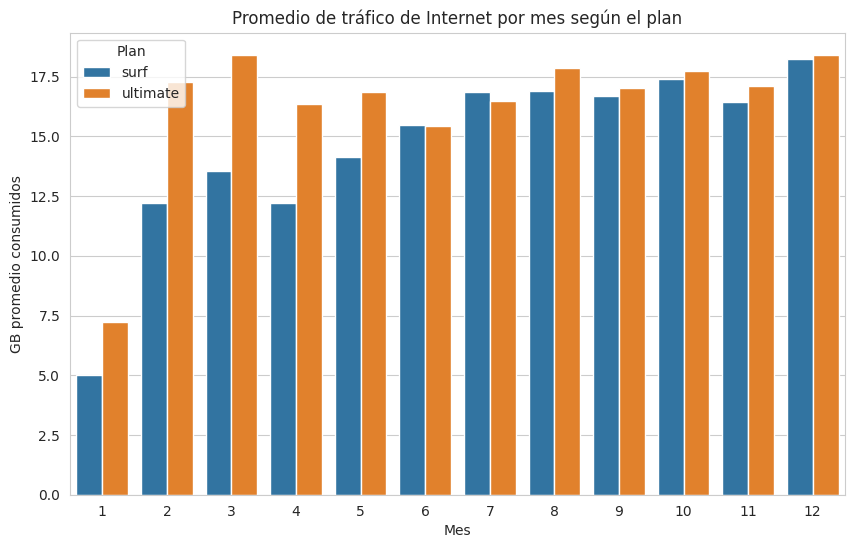

In [36]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

avg_gb_per_plan = monthly_usage.groupby(['plan', 'month'])['gb_used'].mean().reset_index()

# Graficar
plt.figure(figsize=(10,6))
sns.barplot(x='month', y='gb_used', hue='plan', data=avg_gb_per_plan)
plt.title('Promedio de tráfico de Internet por mes según el plan')
plt.xlabel('Mes')
plt.ylabel('GB promedio consumidos')
plt.legend(title='Plan')
plt.show()

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]


##### * Los usuarios del plan `ultimate` tienen un mayor tráfico de internet, lo cual tiene correlación con que su plan incluye más GB sin necesidad de generar cargos extra.
##### * Se detecta mayor actividad en algunos meses y como los planes influyen en el comportamiento de consumo de datos.

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [37]:
# Estadísticas descriptivas de los ingresos por plan
revenue_stats = monthly_usage.groupby('plan')['total_revenue'].describe()

print(revenue_stats)

           count       mean        std   min   25%    50%    75%     max
plan                                                                    
surf      1573.0  60.706408  55.388042  20.0  20.0  40.36  80.36  590.37
ultimate   720.0  72.313889  11.395108  70.0  70.0  70.00  70.00  182.00


**1. Promedio de ingresos por plan**

`ultimate`: ingreso promedio ≈ 72.31 USD/mes.

`surf`: ingreso promedio ≈ 60.71 USD/mes.

El plan `ultimate` genera un ingreso base más alto por usuario, lo que refleja su cuota mensual mayor y los límites más amplios incluidos en el plan.


**2. Variabilidad de los ingresos**

`ultimate`: std ≈ 11.40 → baja variabilidad.

`surf`: std ≈ 55.39 → alta variabilidad.

Los usuarios de `ultimate` tienen ingresos más predecibles: la mayoría paga solo la cuota base y pocos generan cargos extra.

En `surf`, algunos usuarios exceden significativamente los límites, causando picos altos de ingresos que aumentan la desviación estándar. Esto indica que `surf` es más dependiente del consumo adicional para generar ingresos.

**3. Rangos de ingreso**

`ultimate`: min = 70, max = 182 → rango más estrecho, casi todos los usuarios pagan la cuota base.

`surf`: min = 20, max = 590.37 → rango amplio, hay usuarios que pagan mucho más que la cuota base debido al uso extra.

**4. Percentiles**

`ultimate`: los percentiles 25%, 50%, 75% coinciden con la cuota base → casi todos pagan lo mismo.

`surf`: percentiles muestran que la mayoría paga cerca de 20–80 USD, pero algunos usuarios generan ingresos extremos, que elevan el promedio.

<h3>Conclusión general</h3>

Ultimate es un plan con ingresos estables y predecibles, con poca dependencia del consumo extra.

Surf tiene ingresos más variables: la cuota base es baja, pero los usuarios con alto consumo de minutos, mensajes o datos generan ingresos adicionales significativos.

Esto sugiere que, desde un punto de vista de ingresos, Surf puede ser más arriesgado pero también con potencial de alto ingreso por usuarios intensivos.

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [38]:
# Prueba las hipótesis

# Filtrar ingresos por plan
revenue_ultimate = monthly_usage[monthly_usage['plan'] == 'ultimate']['total_revenue']
revenue_surf = monthly_usage[monthly_usage['plan'] == 'surf']['total_revenue']

# Test de t para muestras independientes (Welch)
t_stat, p_value = st.ttest_ind(revenue_ultimate, revenue_surf, equal_var=False)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.4f}")

# Interpretación
alpha = 0.05
if p_value < alpha:
    print("Rechazamos H0: los ingresos promedio son significativamente diferentes.")
else:
    print("No rechazamos H0: no hay evidencia de diferencia significativa.")

T-statistic: 7.952
P-value: 0.0000
Rechazamos H0: los ingresos promedio son significativamente diferentes.


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [39]:
# Prueba las hipótesis

# Fusionamos 'monthly_usage' con 'users' para recuperar la columna 'city'
monthly_usage_with_city = monthly_usage.merge(
    users[['user_id', 'city']],  # solo user_id y city
    on='user_id',
    how='left'
)

# Ahora podemos crear la columna para NY-NJ
monthly_usage_with_city['is_NY_NJ'] = monthly_usage_with_city['city'].str.contains(
    'New York-Newark-Jersey City', regex=False
)


# Ingresos de los dos grupos
revenue_NY_NJ = monthly_usage_with_city[monthly_usage_with_city['is_NY_NJ']]['total_revenue']
revenue_other = monthly_usage_with_city[~monthly_usage_with_city['is_NY_NJ']]['total_revenue']

# Test t de Welch (muestras independientes, varianza desigual)
t_stat, p_value = st.ttest_ind(revenue_NY_NJ, revenue_other, equal_var=False)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.4f}")

# Interpretación
alpha = 0.05
if p_value < alpha:
    print("Rechazamos H0: los ingresos promedio en NY-NJ son significativamente diferentes.")
else:
    print("No rechazamos H0: no hay evidencia de diferencia significativa.")

T-statistic: -2.131
P-value: 0.0335
Rechazamos H0: los ingresos promedio en NY-NJ son significativamente diferentes.


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!

La aplicación de las pruebas de hipotesis me parece acertada, seleccionando los datos y valores correctos
</div>


## Conclusión general

**1. Calidad y limpieza de los datos**

* Los DataFrames de llamadas, mensajes y tráfico de Internet fueron validados: no se encontraron valores nulos, registros con fechas fuera de rango, duplicados completos o valores extremos significativos.
* Se hicieron correcciones menores como convertir `'duration_ceil'` a entero para facilitar cálculos de facturación.
* La información de los usuarios y planes estaba completa, aunque algunos usuarios tenían `churn_date` nulo, lo que indica que seguían activos al final del período analizado.


**2. Comportamiento de los usuarios**

* Los usuarios del plan `ultimate` tienden a utilizar más minutos y datos que los del plan `surf`, mientras que los envíos de mensajes no presentan diferencias tan marcadas.
* La variabilidad en la duración mensual de llamadas es alta en algunos usuarios, especialmente en los que exceden los límites del plan, generando cargos adicionales.
* El análisis por mes mostró patrones estacionales y usuarios con consumos significativamente superiores al promedio.


**3. Ingresos por plan**

* El plan `surf` tiene un ingreso promedio menor (aprox. \$61) pero con alta desviación, debido a usuarios que exceden sus límites y generan cargos extra.
* El plan `ultimate` presenta ingresos más estables (aprox. \$72) y menor desviación, reflejando un consumo más predecible.
* La diferencia de ingresos promedio entre planes fue estadísticamente significativa según la prueba t de Welch, confirmando que los planes generan distintos niveles de facturación.


**4. Análisis geográfico**

* Tras fusionar los datos de usuarios con los de consumo mensual, se probó la hipótesis de que los usuarios del área *New York-Newark-Jersey City (NY-NJ)* generan ingresos diferentes al resto.
* La prueba t mostró que los ingresos promedio en NY-NJ difieren significativamente del resto, lo que puede reflejar características demográficas, socioeconómicas o patrones de consumo locales.


**5. Suposiciones y decisiones importantes**

* Se asumió que todos los registros sin `churn_date` correspondían a usuarios activos.
* Las tarifas y límites de cada plan se aplicaron de manera uniforme a todos los usuarios.
* Se consideraron únicamente los consumos dentro del año 2018.
* Para la prueba de hipótesis geográfica, se identificaron usuarios de NY-NJ mediante coincidencia exacta en el nombre de la ciudad.

## Comentario general del revisor
<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Has realizado un muy buen trabajo al desarrollar este proyecto, las observaciones que has hecho a lo largo del mismo han servido para tomar acción en los pasos posteriores, terminando en resultados positivos.

Este es un proyecto que nos adentra mucho en los analisis que se hacen recurrentemente en las compañías donde se obtiene información para tomar decisiones sobre el negocio que impactan directamente los ingresos, lo has hecho bastante bien!

Continúa con el buen trabajo y mucho éxito en el siguiente Sprint!    
</div>


<div class="alert alert-block alert-success">
<b>Aspectos positivos del proyecto</b> <a class="tocSkip"></a><br />

- Las observaciones intermedias, así como las conclusiones finales me parecen buenas
- El proyecto esta ordenado
    
</div>

<div class="alert alert-block alert-warning">
<b>Aspectos que pueden mejorar del proyecto</b> <a class="tocSkip"></a><br />

- Se pueden incluir más graficas para resaltar las observaciones o datos que muestras, de manera que todas las secciones tengan una consistencia similar

</div>